In [1580]:
%pip install librosa

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1581]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1582]:
filename1 = './voices_dataset/wav/1276.wav'
filename2 = './voices_dataset/wav/6124.wav'

import IPython.display as ipd
import librosa
import librosa.display

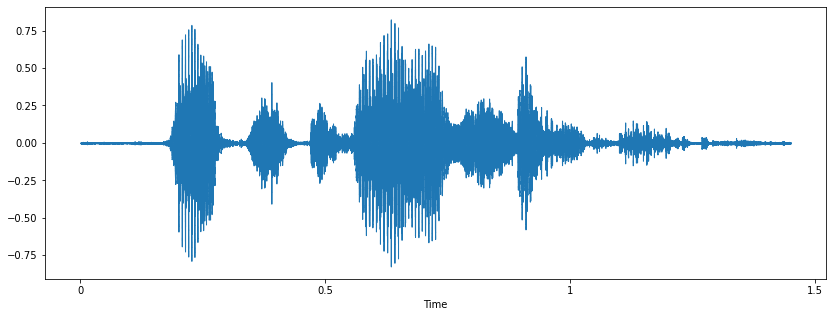

In [1583]:
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename1)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename1)

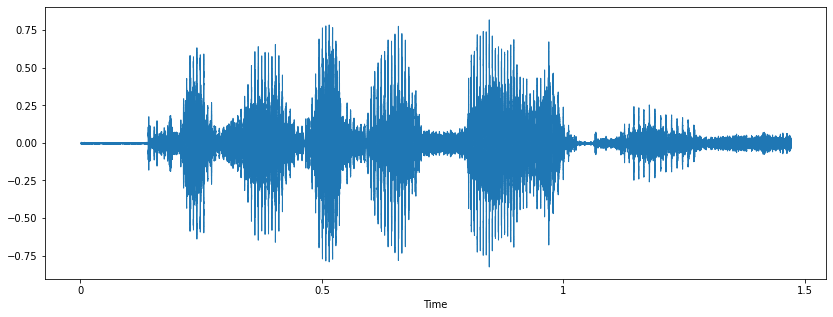

In [1584]:
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename2)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename2)

In [1585]:
sample_rate

22050

In [1586]:
data

array([-0.00133447, -0.00217713, -0.00151612, ...,  0.03654459,
       -0.01109534,  0.        ], dtype=float32)

In [1587]:
import pandas as pd
metadata = pd.read_csv('./voices_dataset/voices_dataset.csv')
metadata.head(10)

,Filename,file_missing?,patientId,country,sex
0,danish2-gain,False,Dutch3,Danish,Male
1,1276,False,Ivan1276,usa,Male
2,6124,False,Ivan6124,usa,Male
3,21083,False,Ivan21083,usa,Male
4,3028959,False,Ivan3028959,usa,Male


In [1588]:
metadata['country'].value_counts()

usa       4
Danish    1
Name: country, dtype: int64

In [1589]:
audio_file_path = './voices_dataset/wav/6124.wav'
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)
print(librosa_audio_data)

[-0.00133447 -0.00217713 -0.00151612 ...  0.03654459 -0.01109534
  0.        ]


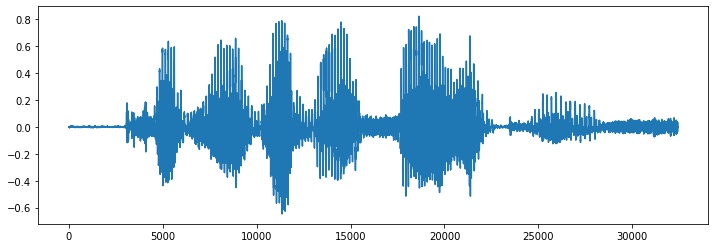

In [1590]:
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)

In [1591]:
## Librosa always converts the signal to one channel, will always be mono
%pip install scipy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1592]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)
wave_audio

array([ -42,  -76,  -61, ...,  911,  108, -732], dtype=int16)

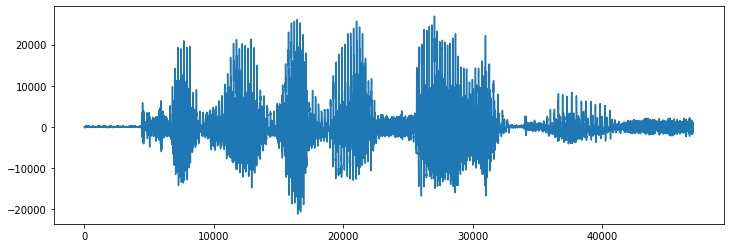

In [1593]:
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

In [1594]:
## Extract Features with mel frecuency
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=120)
print(mfccs.shape)

(120, 64)


In [1595]:
mfccs

array([[-4.5422778e+02, -4.3037421e+02, -4.2775058e+02, ...,
        -2.7295145e+02, -2.6817365e+02, -2.8466031e+02],
       [ 8.4919144e+01,  9.0777885e+01,  9.0643349e+01, ...,
        -5.1337223e+01, -4.6608971e+01, -4.1464848e+01],
       [ 1.3826959e+01,  4.0114260e+00, -5.4782152e-02, ...,
         3.1453445e+01,  3.1073132e+01,  2.7846451e+01],
       ...,
       [ 6.8275148e-01, -4.3508619e-01, -2.3171997e-01, ...,
        -7.1324088e-02, -9.2634761e-01, -6.6484439e-01],
       [ 7.6945019e-01,  2.7311249e+00,  4.4854298e+00, ...,
         4.3530002e+00,  3.4343827e-01, -1.4366431e+00],
       [-1.0686591e+00,  8.1864405e-01,  2.3611231e+00, ...,
         2.6912813e+00,  2.2113490e+00,  1.4784992e+00]], dtype=float32)

In [1596]:
## Extracting MFCC'S for every audio file
audio_dataset_path = './voices_dataset/wav/'

In [1597]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=120)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [1598]:
%pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1599]:
import numpy as np
import os
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["Filename"]) + str('.wav'))
    final_class_labels=row["patientId"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

5it [00:00, 10.95it/s]


In [1600]:
### converting extracted_features to pandas dataframe
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'patientId'])
extracted_features_df.head(10)

,feature,patientId
0,"[-353.54675, 75.54825, 27.237038, 21.780878, -...",Dutch3
1,"[-239.28688, 97.57831, -1.4905313, 19.915651, ...",Ivan1276
2,"[-210.43982, 97.30815, -18.434109, 48.121483, ...",Ivan6124
3,"[-298.90274, 97.69762, -19.878944, 30.664011, ...",Ivan21083
4,"[-304.38245, 62.65227, 9.120278, 33.907486, -5...",Ivan3028959


In [1601]:
## Split the dataset into independent and dependent dataset
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['patientId'].tolist())

In [1602]:
X

array([[-3.53546753e+02,  7.55482483e+01,  2.72370377e+01,
         2.17808781e+01, -1.38302650e+01, -4.17217541e+00,
        -1.69368801e+01, -2.12026653e+01, -2.84375839e+01,
         4.02490330e+00, -1.11848526e+01, -2.28692603e+00,
        -2.19295101e+01, -2.96197104e+00, -4.53366423e+00,
        -1.52165585e+01, -1.24891958e+01, -4.38307852e-01,
        -8.37827015e+00, -1.22390547e+01, -6.28461599e+00,
        -6.79992962e+00, -5.44811821e+00, -6.18029165e+00,
        -5.05785322e+00, -4.57597160e+00, -4.62896776e+00,
        -4.39822721e+00,  6.91352427e-01,  2.11271644e+00,
         3.82220626e+00,  3.26237488e+00,  3.70276737e+00,
         7.95055962e+00,  3.55980778e+00,  5.84637547e+00,
         7.68442726e+00,  5.93628407e+00,  4.66330957e+00,
         2.07991481e+00,  2.94734192e+00, -4.66431677e-01,
         2.67476726e+00,  3.46621728e+00,  9.23286974e-01,
         1.40438461e+00, -2.97775298e-01,  1.03426623e+00,
        -9.50152874e-01, -5.18983841e-01, -5.56163490e-0

In [1603]:
y

array(['Dutch3', 'Ivan1276', 'Ivan6124', 'Ivan21083', 'Ivan3028959'],
      dtype='<U11')

In [1604]:
X.shape

(5, 120)

In [1605]:
### Label encoding
y = np.array(pd.get_dummies(y))

In [1606]:
y.shape

(5, 5)

In [1607]:
y

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [1608]:
### Train Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [1609]:
X_train.shape

(3, 120)

In [1610]:
X_test.shape

(2, 120)

In [1611]:
y_train.shape

(3, 5)

In [1612]:
y_train

array([[0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [1613]:
y_test.shape

(2, 5)

In [1614]:
y_test

array([[0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0]], dtype=uint8)

In [1615]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1616]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [1617]:
## number of patietsId
num_labels = y.shape[1]

In [1618]:
model = Sequential()
### first layer
model.add(Dense(100, input_shape=(120,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
### second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
### third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
### final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [1619]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_147 (Dense)           (None, 100)               12100     
                                                                 
 activation_147 (Activation)  (None, 100)              0         
                                                                 
 dropout_111 (Dropout)       (None, 100)               0         
                                                                 
 dense_148 (Dense)           (None, 200)               20200     
                                                                 
 activation_148 (Activation)  (None, 200)              0         
                                                                 
 dropout_112 (Dropout)       (None, 200)               0         
                                                                 
 dense_149 (Dense)           (None, 100)             

In [1620]:
model.compile(
  loss='binary_crossentropy', 
  metrics=['accuracy'],
  optimizer='adam'
)

In [1621]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 500
num_batch_size = 50

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(
  X_train,
  y_train,
  batch_size=num_batch_size,
  epochs=num_epochs,
  validation_data=(X_test, y_test),
  callbacks=[checkpointer],
  verbose=1
)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 9.2320 - accuracy: 0.3333
Epoch 1: val_loss improved from inf to 1.58962, saving model to saved_models/audio_classification.hdf5
1/1 [==============================] - 1s 767ms/step - loss: 9.2320 - accuracy: 0.3333 - val_loss: 1.5896 - val_accuracy: 0.5000
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 13.3177 - accuracy: 0.0000e+00
Epoch 2: val_loss improved from 1.58962 to 1.51599, saving model to saved_models/audio_classification.hdf5
1/1 [==============================] - 0s 48ms/step - loss: 13.3177 - accuracy: 0.0000e+00 - val_loss: 1.5160 - val_accuracy: 0.5000
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 7.9606 - accuracy: 0.0000e+00
Epoch 3: val_loss improved from 1.51599 to 1.43387, saving model to saved_models/audio_classification.hdf5
1/1 [==============================] - 0s 48ms/step - loss: 7.9606 - accuracy: 0.0000e+00 - val_loss: 1.4339 - val_accuracy: 0.5000
E

In [1622]:
test_accuracy = model.evaluate(X_test, y_test, verbose = 0)
test_accuracy

[2.1279358863830566, 0.0]

In [1635]:
### testing the model
test_filename = './voices_dataset/wav/danish2-gain.wav'
audio, sample_rate = librosa.load(test_filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=120)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
# print(mfccs_scaled_features)

# using juts one item
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
#print(mfccs_scaled_features)
#print(mfccs_scaled_features.shape)

predicted_label = model.predict(mfccs_scaled_features)
predicted_classes = np.argmax(predicted_label, axis=1)
predicted_classes

array([0])

In [1636]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(metadata['patientId']))

prediction_class = labelencoder.inverse_transform(predicted_classes)
prediction_class

array(['Dutch3'], dtype=object)

In [1637]:
metadata.head(10)

,Filename,file_missing?,patientId,country,sex
0,danish2-gain,False,Dutch3,Danish,Male
1,1276,False,Ivan1276,usa,Male
2,6124,False,Ivan6124,usa,Male
3,21083,False,Ivan21083,usa,Male
4,3028959,False,Ivan3028959,usa,Male
